In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [10]:
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [11]:
x,y = make_regression(n_features=1,n_informative=1,n_samples=100,n_targets=1,noise=30,random_state=20)

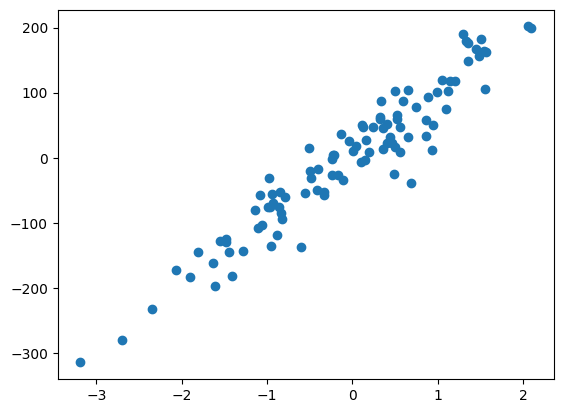

In [12]:
plt.scatter(x,y)

In [13]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()


In [14]:
x_train,x_test,y_train,y_test= train_test_split(x,y)

In [15]:
reg.fit(x_train,y_train)

LinearRegression()

In [16]:
y_pred=reg.predict(x_test)

In [17]:
reg.coef_,reg.intercept_

(array([95.39561172]), 2.3693208717290517)

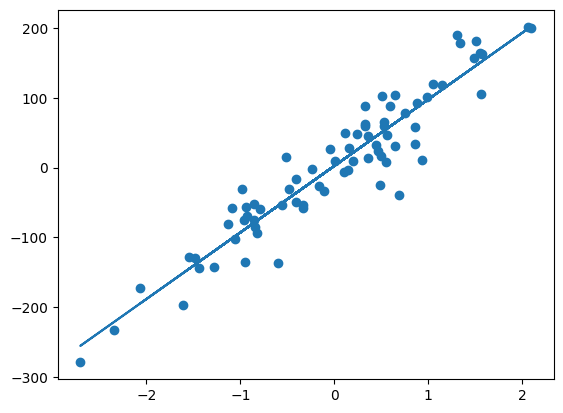

In [20]:
plt.plot(x_train,reg.predict(x_train))
plt.scatter(x_train,y_train)

c:\Users\Ripple\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\Ripple\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Ripple\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.274e+04, tolerance: 7.867e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solver

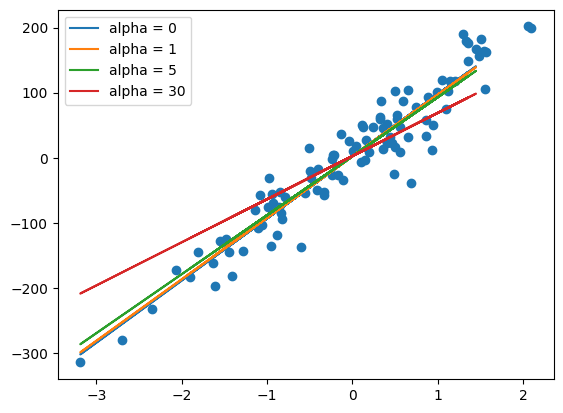

In [25]:
alphas = [0,1,5,30]
plt.scatter(x,y)
for i in alphas:
    L = Lasso(alpha=i)
    L.fit(x_train,y_train)
    plt.plot(x_test,L.predict(x_test),label=f"alpha = {i}")
plt.legend()

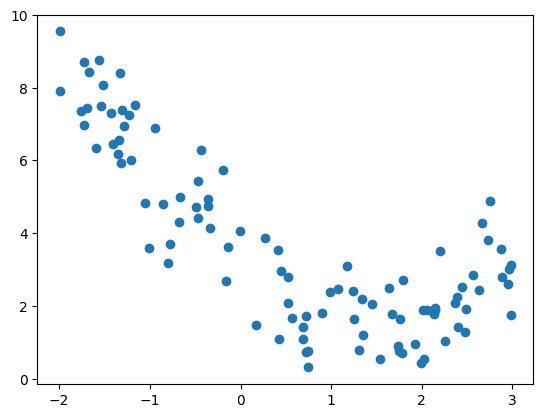

In [27]:
m= 100
x1 = 5 * np.random.rand(m,1)-2
x2 = 0.7*x1 **2 -2 *x1 + 3 + np.random.randn(m,1)

plt.scatter(x1,x2)

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

c:\Users\Ripple\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\Ripple\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Ripple\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.215e+01, tolerance: 5.830e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solver

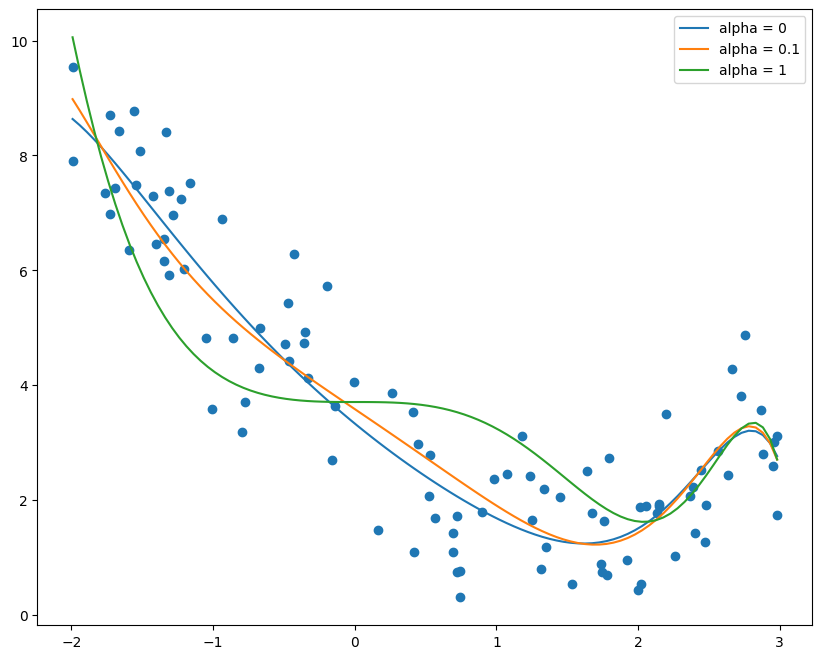

In [35]:
def get_pred_lasso(x1,x2,x_new,alpha):
    model = Pipeline([
        ('poly',PolynomialFeatures(degree=10)),
        ('reg',Lasso(alpha=alpha))
    ])

    model.fit(x1,x2)
    return model.predict(x_new)


alphas = [0,0.1, 1]

plt.figure(figsize=(10,8))
plt.scatter(x1,x2)
for i in alphas:
    max=np.max(x1)
    min = np.min(x1)
    x_new = np.linspace(min,max,x1.shape[0])
    plt.plot(x_new,get_pred_lasso(x1,x2,x_new.reshape(-1,1),i),label=f"alpha = {i}")

plt.legend()
plt.show()
    